In [15]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [16]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2776 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1722 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1285 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1181 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1110 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1060 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1023 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0977 - val_loss: 0.0957

In [21]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 441us/step


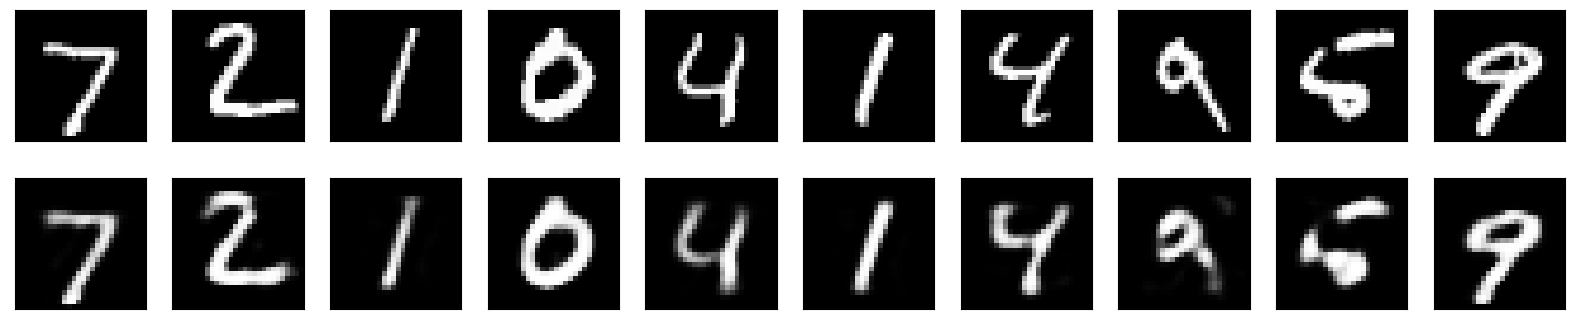

In [22]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 458us/step


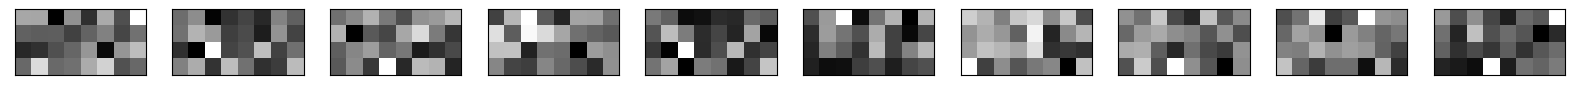

In [23]:
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((8, 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

x_enc_train = encoder.predict(x_train)
x_enc_test = encoder.predict(x_test)

modelo = LogisticRegression()
modelo.fit(x_train,y_train)

modeloAutoEncoder = LogisticRegression()
modeloAutoEncoder.fit(x_enc_train,y_train)

print(f"Accuracy")
print(f"Regresion Logistica: {modelo.score(x_test,y_test)*100:.4f}%")
print(f"Autoencoder: {modeloAutoEncoder.score(x_enc_test,y_test)*100:.4f}%")

313/313 [==============================] - 0s 451us/step


/home/jesus/Ulima/VIII-Ciclo/Machine-learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy
Regresion Logistica: 92.5600%
Autoencoder: 89.7300%


/home/jesus/Ulima/VIII-Ciclo/Machine-learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
autoencoder.save("./autoencoder.h5",save_format='h5')

In [26]:
reconstructed_model = keras.models.load_model("./autoencoder.h5")

In [27]:
reconstructed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
